In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense,SpatialDropout1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

import spacy
from sklearn.preprocessing import MaxAbsScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


In [114]:
#df=pd.read_csv("https://raw.githubusercontent.com/AdrielC/autotradeR/master/Data/autoTradeR-2018-06-17-Private")

In [115]:
#df.to_csv("private_2018_car.csv")

In [135]:
df=pd.read_csv("private_2018_car.csv")
df.dropna(axis=0,subset=["carFeaturesText","listing_title"],inplace=True)

df["carFeaturesText"]=df["listing_title"]+" "+df["carFeaturesText"] + " Mileage:"+df["Mileage"].apply(lambda x: str(x) if x!=np.nan else "") + " "+df["model"].fillna("") +' mpg:'+df['HyMpg'].apply(lambda x: str(x)).fillna("0")
#df=df.drop(["listing_distance_miles","listing_url"])

In [136]:
print(df.head(3))

   Unnamed: 0  red  green  blue  rowNum  \
0           0  227     19    19       1   
1           1    5     81   141       2   
2           2  227     19    19       3   

                               listing_title  listing_distance_miles  \
0    Used 2014 Jeep Wrangler Unlimited Sport                     0.0   
1     Used 2015 Jeep Wrangler Willys Wheeler                    12.0   
2  Used 2016 Jeep Wrangler Unlimited Rubicon                    15.0   

                                         listing_url    price  \
0  /cars-for-sale/vehicledetails.xhtml?listingId=...  51000.0   
1  /cars-for-sale/vehicledetails.xhtml?listingId=...  21999.0   
2  /cars-for-sale/vehicledetails.xhtml?listingId=...  80000.0   

   listingPriceRedu  ...          Dealer              model    year  \
0             False  ...  Private Seller    Unlimited Sport  2014.0   
1             False  ...  Private Seller     Willys Wheeler  2015.0   
2             False  ...  Private Seller  Unlimited Rubicon  201

Index(['Unnamed: 0', 'red', 'green', 'blue', 'rowNum', 'listing_title',
       'listing_distance_miles', 'listing_url', 'price', 'listingPriceRedu',
       'Body Style', 'Drive Type', 'Engine', 'Mileage', 'Transmission',
       'ATC Car ID', 'Fuel', 'Stock #', 'VIN', 'carFeaturesText', 'exterior',
       'interior', 'sellerComment', 'Basic Warranty', 'Corrosion Warranty',
       'Drivetrain Warranty', 'Roadside Assistance Warranty',
       'newListingIndicator', 'Dealer', 'model', 'year', 'ownershipStatus',
       'Location', 'sellerType', 'DriveTypeGeneral', 'numWordsinComment',
       'CityMpg', 'HyMpg'],
      dtype='object')


C:\Users\dnishimoto\AppData\Local\Temp\ipykernel_13548\536047693.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prices['price_group'] = pd.cut(df_prices['price'], 10)
C:\Users\dnishimoto\AppData\Local\Temp\ipykernel_13548\536047693.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prices['milage_group']=pd.cut(df_prices["Mileage"],10)


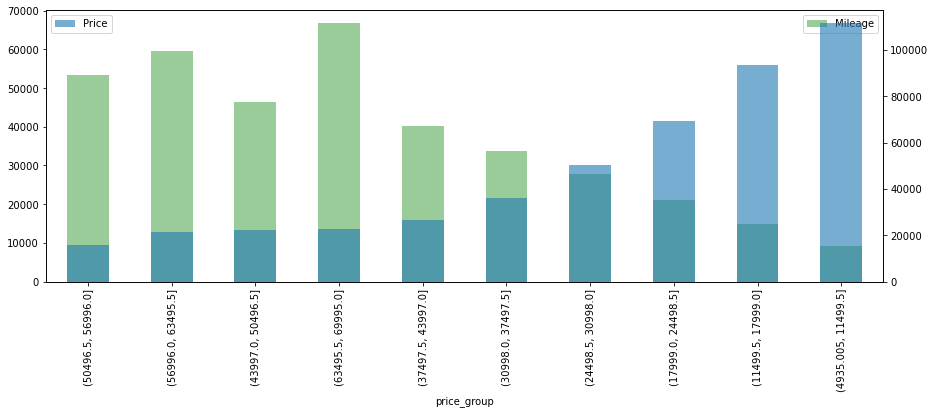

In [137]:
print(df.columns)
mask=df.applymap(np.isreal)

df=df[mask["Mileage"]]

filter=(df["price"]<70000) & (df["Mileage"]<150000) 
df_prices=df[filter]

df_prices['price_group'] = pd.cut(df_prices['price'], 10)
df_prices['milage_group']=pd.cut(df_prices["Mileage"],10)

df_price_grouped = df_prices.groupby('price_group').mean()
df_mileage_grouped = df_prices.groupby('price_group').mean()

#print(mask)'
plt.figure(figsize=(15, 5))

df_price_sorted=df_price_grouped.sort_values(by="price")
df_mileage_sorted=df_mileage_grouped.sort_values(by="Mileage")

df_price_sorted['price'].plot(kind="bar",label="Mileage",color="green",alpha=0.4)
plt.xticks(rotation=90)
plt.legend()
twinx=plt.twinx()
df_mileage_sorted['Mileage'].plot(ax=twinx,kind="bar",label="Price",alpha=0.6)
plt.legend()
plt.show()

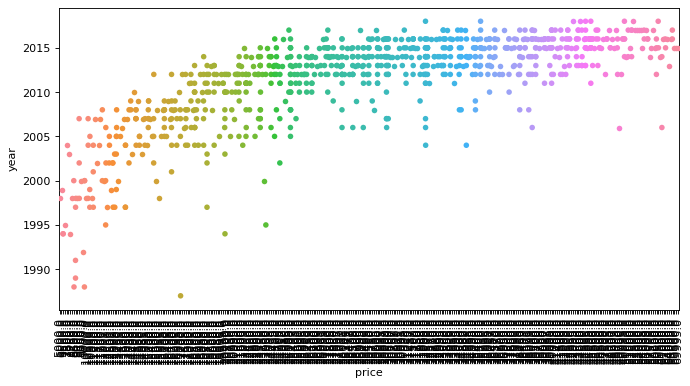

C:\Users\dnishimoto\Anaconda3\envs\deeplearning\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 74.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dnishimoto\Anaconda3\envs\deeplearning\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dnishimoto\Anaconda3\envs\deeplearning\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 72.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dnishimoto\Anaconda3\envs\deeplearning\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 63.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dni

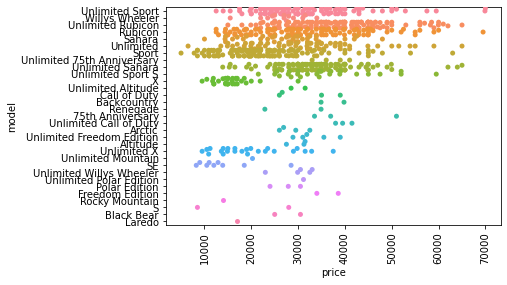

In [138]:
plt.figure(figsize=(10, 5), dpi=80)
sns.stripplot(data=df_prices, y="year", x="price",jitter=True)
plt.xticks(rotation=90)
plt.show()

sns.swarmplot(data=df_prices, y="model", x="price")
plt.xticks(rotation=90)
plt.show()

In [139]:

#df_prices["carFeaturesText"]=df_prices["carFeaturesText"].fillna("")
print(df_prices["carFeaturesText"])

0      Used 2014 Jeep Wrangler Unlimited Sport Backup...
1      Used 2015 Jeep Wrangler Willys Wheeler Bluetoo...
3      Used 2014 Jeep Wrangler Unlimited Rubicon Back...
4      Used 2006 Jeep Wrangler CD PlayerPremium Audio...
5      Used 2012 Jeep Wrangler Rubicon Bluetooth Hand...
                             ...                        
994    Used 2005 Jeep Wrangler Sport CD PlayerCruise ...
996    Used 2012 Jeep Wrangler Sport CD PlayerCruise ...
997    Used 2006 Jeep Wrangler Unlimited Sport CD Pla...
998    Used 2011 Jeep Wrangler Unlimited CD PlayerCru...
999    Used 2012 Jeep Wrangler Arctic Bluetooth Hands...
Name: carFeaturesText, Length: 900, dtype: object


In [140]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

y = pd.get_dummies(df_prices['price_group']).values
print('Shape of label tensor:', y.shape)

LABELS=sorted(df_prices['price_group'].unique())

print(y)
print(LABELS)

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df_prices["carFeaturesText"].values)
word_index = tokenizer.word_index

X = tokenizer.texts_to_sequences(df_prices["carFeaturesText"].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.10, random_state = 42)

Shape of label tensor: (900, 10)
[[0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[Interval(4935.005, 11499.5, closed='right'), Interval(11499.5, 17999.0, closed='right'), Interval(17999.0, 24498.5, closed='right'), Interval(24498.5, 30998.0, closed='right'), Interval(30998.0, 37497.5, closed='right'), Interval(37497.5, 43997.0, closed='right'), Interval(43997.0, 50496.5, closed='right'), Interval(50496.5, 56996.0, closed='right'), Interval(56996.0, 63495.5, closed='right'), Interval(63495.5, 69995.0, closed='right')]
Shape of data tensor: (900, 250)


In [141]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(256, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(len(LABELS), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d_6 (Spatia  (None, 250, 100)         0         
 lDropout1D)                                                     
                                                                 
 lstm_6 (LSTM)               (None, 256)               365568    
                                                                 
 dense_6 (Dense)             (None, 10)                2570      
                                                                 
Total params: 5,368,138
Trainable params: 5,368,138
Non-trainable params: 0
_________________________________________________________________
None


In [144]:
epochs = 50
batch_size = 64

#history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)


Epoch 1/50
12/12 [==============================] - 48s 4s/step - loss: 1.0717 - accuracy: 0.5514 - val_loss: 1.3106 - val_accuracy: 0.4815
Epoch 2/50
12/12 [==============================] - 46s 4s/step - loss: 0.9786 - accuracy: 0.6214 - val_loss: 1.3935 - val_accuracy: 0.4321
Epoch 3/50
12/12 [==============================] - 1534s 139s/step - loss: 0.9111 - accuracy: 0.6379 - val_loss: 1.3628 - val_accuracy: 0.5062
Epoch 4/50
12/12 [==============================] - 50916s 4628s/step - loss: 0.8442 - accuracy: 0.6694 - val_loss: 1.3950 - val_accuracy: 0.4815
Epoch 5/50
12/12 [==============================] - 34s 3s/step - loss: 0.7377 - accuracy: 0.7160 - val_loss: 1.5038 - val_accuracy: 0.4938
Epoch 6/50
12/12 [==============================] - 42s 3s/step - loss: 0.7549 - accuracy: 0.7284 - val_loss: 1.6194 - val_accuracy: 0.4568
Epoch 7/50
12/12 [==============================] - 50s 4s/step - loss: 0.6830 - accuracy: 0.7490 - val_loss: 1.5723 - val_accuracy: 0.4691
Epoch 8/50

In [145]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

3/3 [==============================] - 1s 470ms/step - loss: 4.6749 - accuracy: 0.3000
Test set
  Loss: 4.675
  Accuracy: 0.300


In [146]:
def GetCategory(pred,LABELS):
    returnVal=[]
    curr_index=0
    curr_val=0
    for item in pred:
        val=max(item)
        index=list(item).index(val)
        #print(val,LABELS[index])
        if val>curr_val:
            curr_index=index
            curr_val=val
            
    return LABELS[curr_index]
    #returnVal.append(LABELS[np.argmax(np.array(item))])
    #return returnVal
count=0        
for key,item in df_prices.iterrows():
    data=[]
    data.append(item['carFeaturesText'])
    seq = tokenizer.texts_to_sequences(data)
    padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
    pred = model.predict(padded)
    print(pred)
    category=LABELS[np.argmax(pred)]
    print(data, "\n[predicted category]", category, "\n[actual category]",item['price_group'])
    if count>20:
        break
    count+=1

1/1 [==============================] - 1s 813ms/step
[[5.9954226e-03 6.9896669e-05 1.9185451e-05 9.3408526e-05 2.2705743e-05
  2.9743756e-05 1.8358506e-04 9.3311578e-01 5.0746534e-02 9.7237714e-03]]
['Used 2014 Jeep Wrangler Unlimited Sport Backup CameraBluetooth Hands-FreeCD PlayerCruise ControlHeated SeatsKeyless EntryLeather SeatsLift KitPortable Audio ConnectionPower Locks Mileage:13500.0 Unlimited Sport mpg:nan'] 
[predicted category] (50496.5, 56996.0] 
[actual category] (50496.5, 56996.0]
1/1 [==============================] - 0s 151ms/step
[[2.2053507e-11 5.1436539e-09 2.2124441e-05 9.9914253e-01 8.3323073e-04
  2.0836587e-06 3.7746342e-10 5.4272968e-11 2.5855888e-08 7.6110618e-11]]
['Used 2015 Jeep Wrangler Willys Wheeler Bluetooth Hands-FreeCD PlayerCruise ControlKeyless EntryLift KitPower LocksPower WindowsPremium WheelsSteering Wheel ControlsTrailer Hitch Mileage:58000.0 Willys Wheeler mpg:nan'] 
[predicted category] (24498.5, 30998.0] 
[actual category] (17999.0, 24498.5]


1/1 [==============================] - 0s 170ms/step
[[8.6686003e-07 5.4795453e-03 1.1003882e-02 9.8238903e-01 7.8293006e-04
  8.4638938e-05 5.0203635e-06 1.1310128e-06 2.5237619e-04 6.0879643e-07]]
['Used 2013 Jeep Wrangler Rubicon Bluetooth Hands-FreeCD PlayerCruise ControlHeated SeatsKeyless EntryLeather SeatsPortable Audio ConnectionPower LocksPower WindowsPremium Audio Mileage:80500.0 Rubicon mpg:nan'] 
[predicted category] (24498.5, 30998.0] 
[actual category] (24498.5, 30998.0]
1/1 [==============================] - 0s 141ms/step
[[1.11358766e-07 1.62051401e-05 9.97604191e-01 2.35185586e-03
  2.65870367e-05 4.90684215e-07 2.40588260e-08 6.93888724e-09
  4.32388504e-07 9.12113407e-09]]
['Used 2007 Jeep Wrangler Unlimited Sahara CD PlayerCruise ControlDVD PlayerLift KitNavigationPortable Audio ConnectionPower LocksPower WindowsPremium WheelsSecurity System Mileage:97000.0 Unlimited Sahara mpg:nan'] 
[predicted category] (17999.0, 24498.5] 
[actual category] (17999.0, 24498.5]
1/1 

In [147]:
print("Lets apply random forest to predict")

TEXT=['carFeaturesText']
TARGET='price_group'
NUMERIC=[]
#def combine_text_columns(data_frame, to_drop=NUMERIC + LABELS):
def combine_text_columns(data_frame, text_labels=TEXT):
    """ converts all text in each row of data_frame to single vector """
    # Drop non-text columns that are in the df
    #to_drop = set(to_drop) & set(data_frame.columns.tolist())
    text_data =data_frame[text_labels]
     
    # Replace nans with blanks
    text_data.fillna("",inplace=True)
    
    # Join all text items in a row that have a space in between
    return text_data.apply(lambda x: " ".join(x), axis=1)

nlp = spacy.load('en_core_web_sm')
stopwords=spacy.lang.en.stop_words.STOP_WORDS
chi_k = 300
# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

get_text_data = FunctionTransformer(combine_text_columns,validate=False)

# Preprocess the numeric data: get_numeric_data
#get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC], validate=False)

pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                #('numeric_features', Pipeline([
                #    ('selector', get_numeric_data),
                #    ('imputer', SimpleImputer())
                #])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', TfidfVectorizer(stop_words='english')),
                    #('vectorizer',CountVectorizer(stop_words=stopwords,token_pattern=TOKENS_ALPHANUMERIC, ngram_range=(1,2))),('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(RandomForestClassifier(n_estimators=400))),
        #('nb', MultinomialNB()),
        #('lr', OneVsRestClassifier(LogisticRegression(C=100)))
    ])

Lets apply random forest to predict


C:\Users\dnishimoto\Anaconda3\envs\deeplearning\lib\site-packages\spacy\util.py:837: UserWarning: [W095] Model 'en_core_web_sm' (3.1.0) was trained with spaCy v3.1 and may not be 100% compatible with the current version (3.3.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [148]:
X=df_prices[TEXT]
encoder=LabelEncoder()
y=encoder.fit_transform(df_prices[TARGET])



#print(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3, random_state=42)

pl.fit(X_train,y_train)
predictions=pl.predict(X_train)

accuracy = pl.score(X_train, y_train)
print("\nAccuracy:{:.2f}% ".format(accuracy))


Accuracy:1.00% 


In [149]:
predictions=pl.predict(X_test)

index=0
for key,item in X_test.iterrows():
    #print(item['cleaned_hm'])
    sentence=item['carFeaturesText']
    result=predictions[index]
    #actual=y_test[index]
    print(sentence,"\n[[result]]",result,"\n[[actual]]",y_test[index])
    index+=1
    if index>20:
        break
    

Used 2014 Jeep Wrangler Unlimited Sport Bluetooth Hands-FreeCD PlayerCruise ControlKeyless EntryLift KitPortable Audio ConnectionPower LocksPower WindowsPremium AudioPremium Wheels Mileage:64000.0 Unlimited Sport mpg:nan 
[[result]] 3 
[[actual]] 3
Used 2015 Jeep Wrangler Unlimited Sahara CD PlayerCruise ControlKeyless EntryMulti-zone Climate ControlPower LocksPower WindowsPremium WheelsSecurity SystemSteering Wheel Controls Mileage:28454.0 Unlimited Sahara mpg:20.0 
[[result]] 3 
[[actual]] 4
Used 2012 Jeep Wrangler Sport CD PlayerPremium AudioPremium Wheels Mileage:44521.0 Sport mpg:nan 
[[result]] 1 
[[actual]] 2
Used 2007 Jeep Wrangler X Bluetooth Hands-FreeCruise ControlLift KitNavigationPortable Audio ConnectionPremium AudioPremium WheelsTrailer Hitch Mileage:117400.0 X mpg:nan 
[[result]] 2 
[[actual]] 1
Used 2014 Jeep Wrangler Sport CD PlayerCruise ControlLift KitPremium AudioSteering Wheel Controls Mileage:51000.0 Sport mpg:nan 
[[result]] 2 
[[actual]] 3
Used 1997 Jeep Wrangl

In [150]:
print("done")

done
